Prédictions du CPU PERCENT du Reverse Proxy grace au Modèle ARIMA 
=================================================================

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
series = read_csv('cpu-18-07-06.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, usecols=['time', 'hostname', 'cpu.percent'])
for i in range(7, 12):
    filename = "cpu-18-07-{:02}.csv".format(i)
    series_to_append = read_csv(filename, header=0, parse_dates=[0], index_col=0, squeeze=True, usecols=['time', 'hostname', 'cpu.percent'])
    series = series.append(series_to_append)
series_rp = series[series['hostname'] == 'i-001683a5-rp-static-server-15197471721.novalocal']
series_final = series_rp.drop(columns=['hostname'])

In [4]:
def compute_ARIMA(series_final, p=0, d=0, q=0, step_display=False, figure_size_x=20, figure_size_y=10):
    X = series_final.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    print(len(test))
    for t in range(len(test)):
        model = ARIMA(history, order=(p,d,q))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        if step_display:
            print('t=%d predicted=%f, expected=%f' % (t, yhat, obs))

    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    
    # plot
    pyplot.rcParams['figure.figsize'] = (figure_size_x, figure_size_y)
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()
    

Prédictions avec Modele ARIMA (10,1,0) lag order (p) = 10
---------------------------------------------------------

+ que les 500 premiers points

+ MSE = 2,987
        

170
Test MSE: 2.987


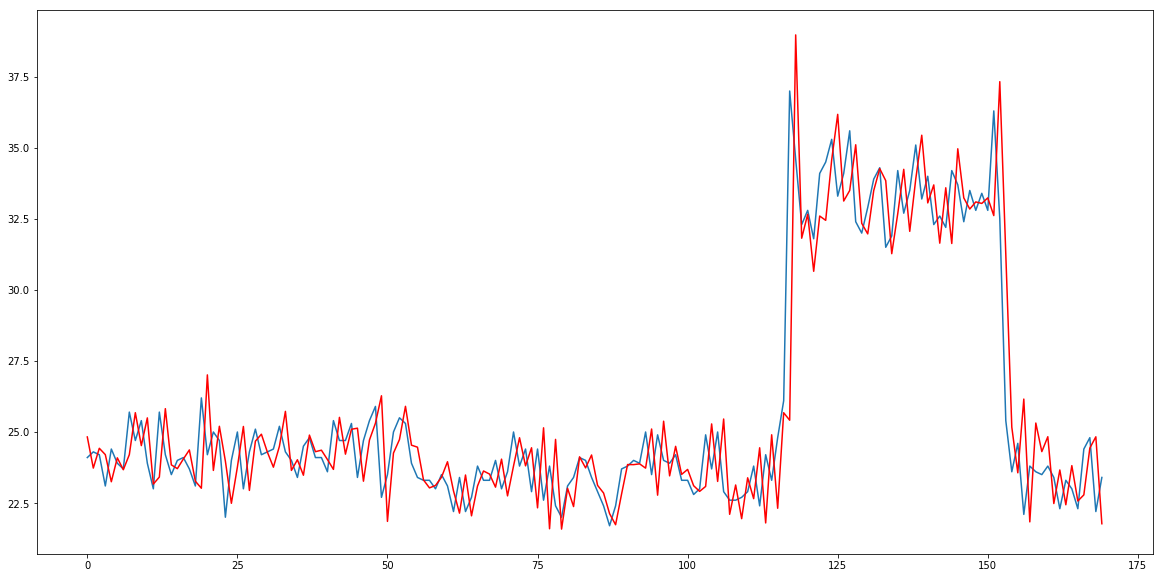

In [6]:
compute_ARIMA(series_final.head(500), 10, 1, 0)

Prédictions avec Modele ARIMA (15,1,0) lag order (p) = 15
---------------------------------------------------------

+ que les 500 premiers points

+ MSE = 3,291

170
Test MSE: 3.291


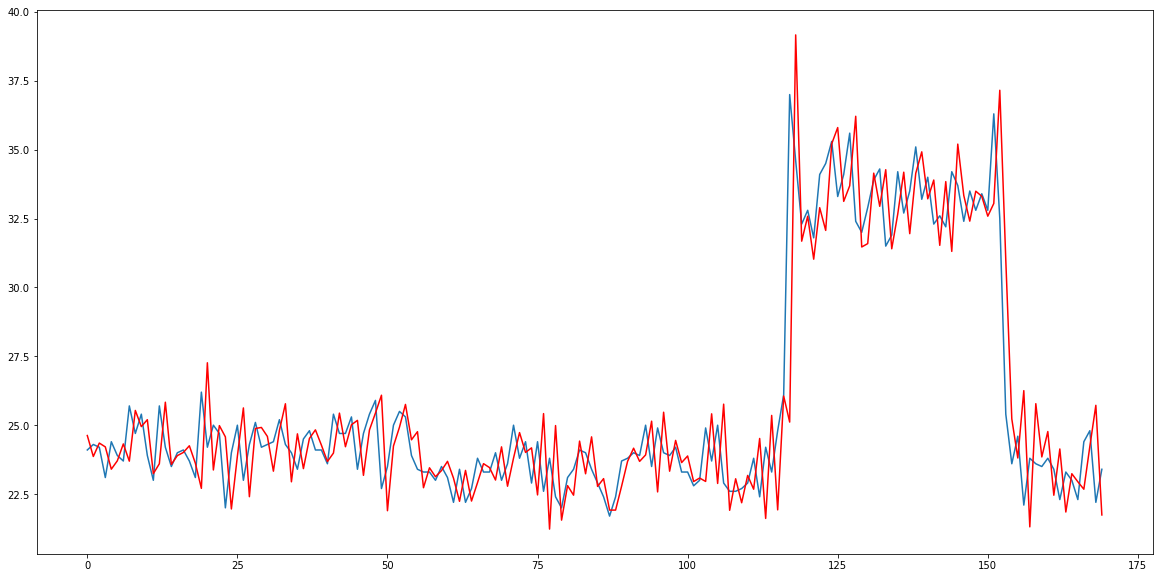

In [8]:
compute_ARIMA(series_final.head(500), 15, 1, 0)

Prédictions avec Modele ARIMA (9,1,0) lag order (p) = 9
---------------------------------------------------------

+ que les 500 premiers points

+ MSE = 2,934

170
Test MSE: 2.934


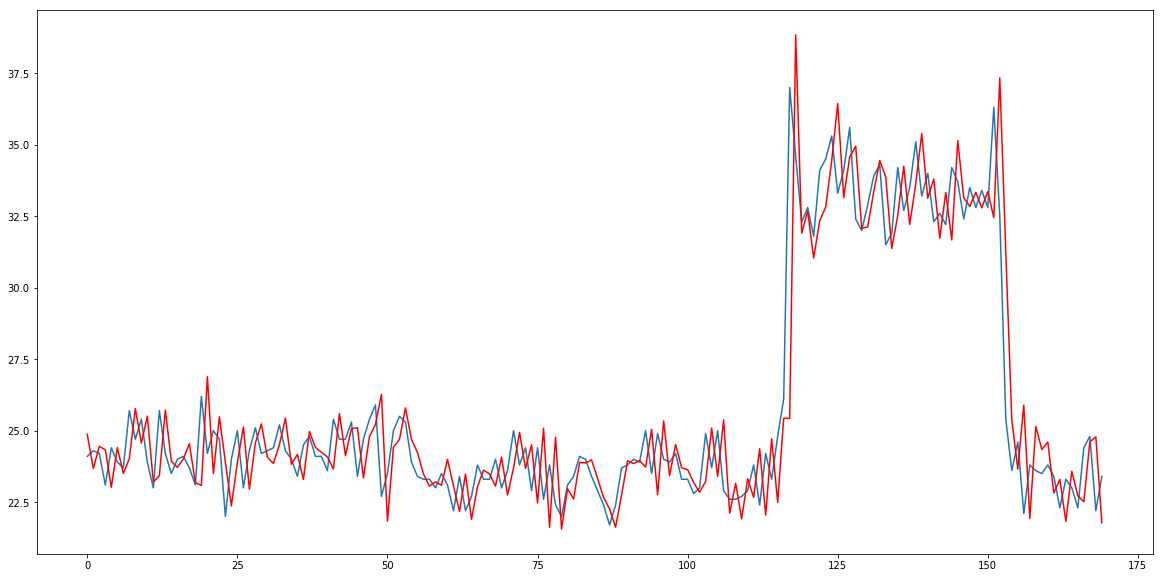

In [9]:
compute_ARIMA(series_final.head(500), 9, 1, 0)

Prédictions avec Modele ARIMA (5,1,0) lag order (p) = 5
---------------------------------------------------------

+ que les 500 premiers points

+ MSE = 2,790

170
Test MSE: 2.790


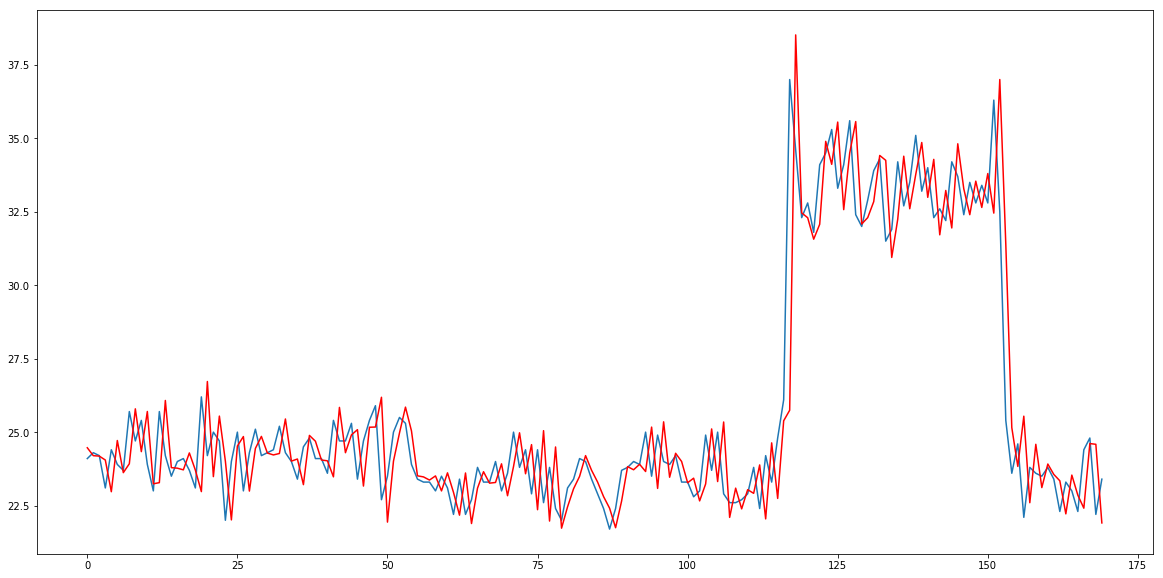

In [10]:
compute_ARIMA(series_final.head(500), 5, 1, 0)

Prédictions avec Modele ARIMA (1,1,0) lag order (p) = 1
---------------------------------------------------------

+ que les 500 premiers points

+ MSE = 2,761

170
Test MSE: 2.761


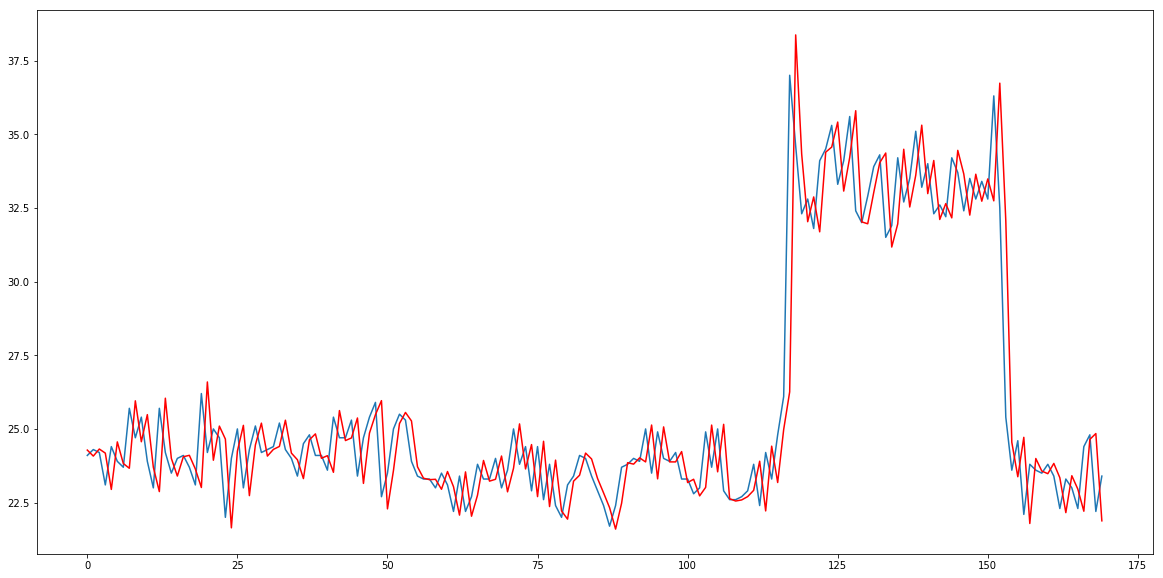

In [11]:
compute_ARIMA(series_final.head(500), 1, 1, 0)

Prédictions avec Modele ARIMA (5,2,0) lag order (p) = 5 et (d) = 2
------------------------------------------------------------------

+ que les 500 premiers points

+ MSE = 3,520

170
Test MSE: 3.520


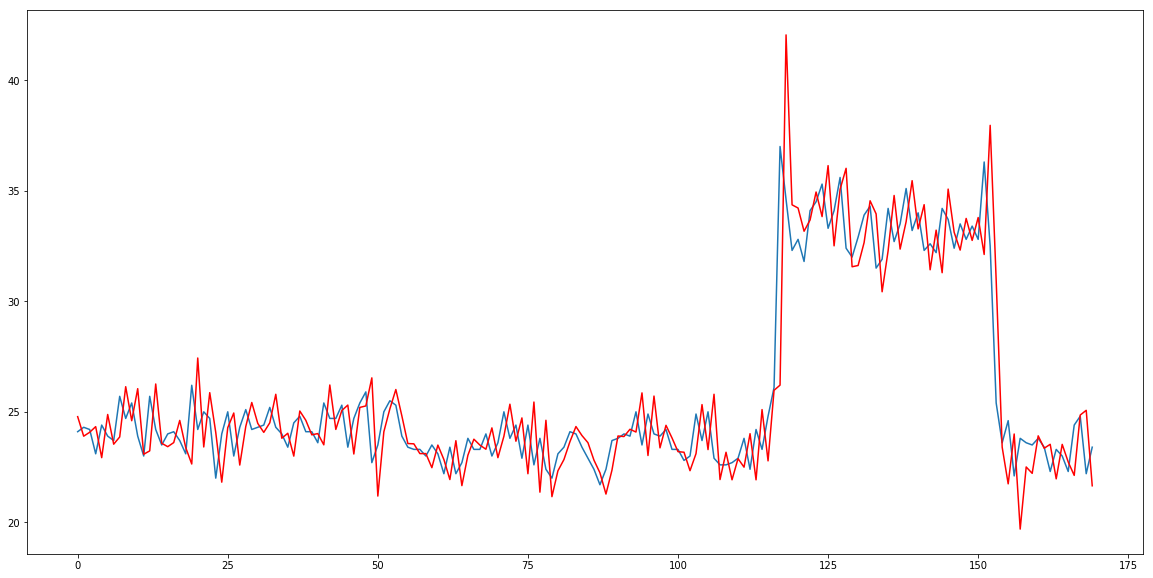

In [12]:
compute_ARIMA(series_final.head(500), 5, 2, 0)

Prédictions avec Modele ARIMA (1,1,0) lag order (p) = 1
-------------------------------------------------------

+ tous les points

+ MSE = 16,231

5874
Test MSE: 16.231


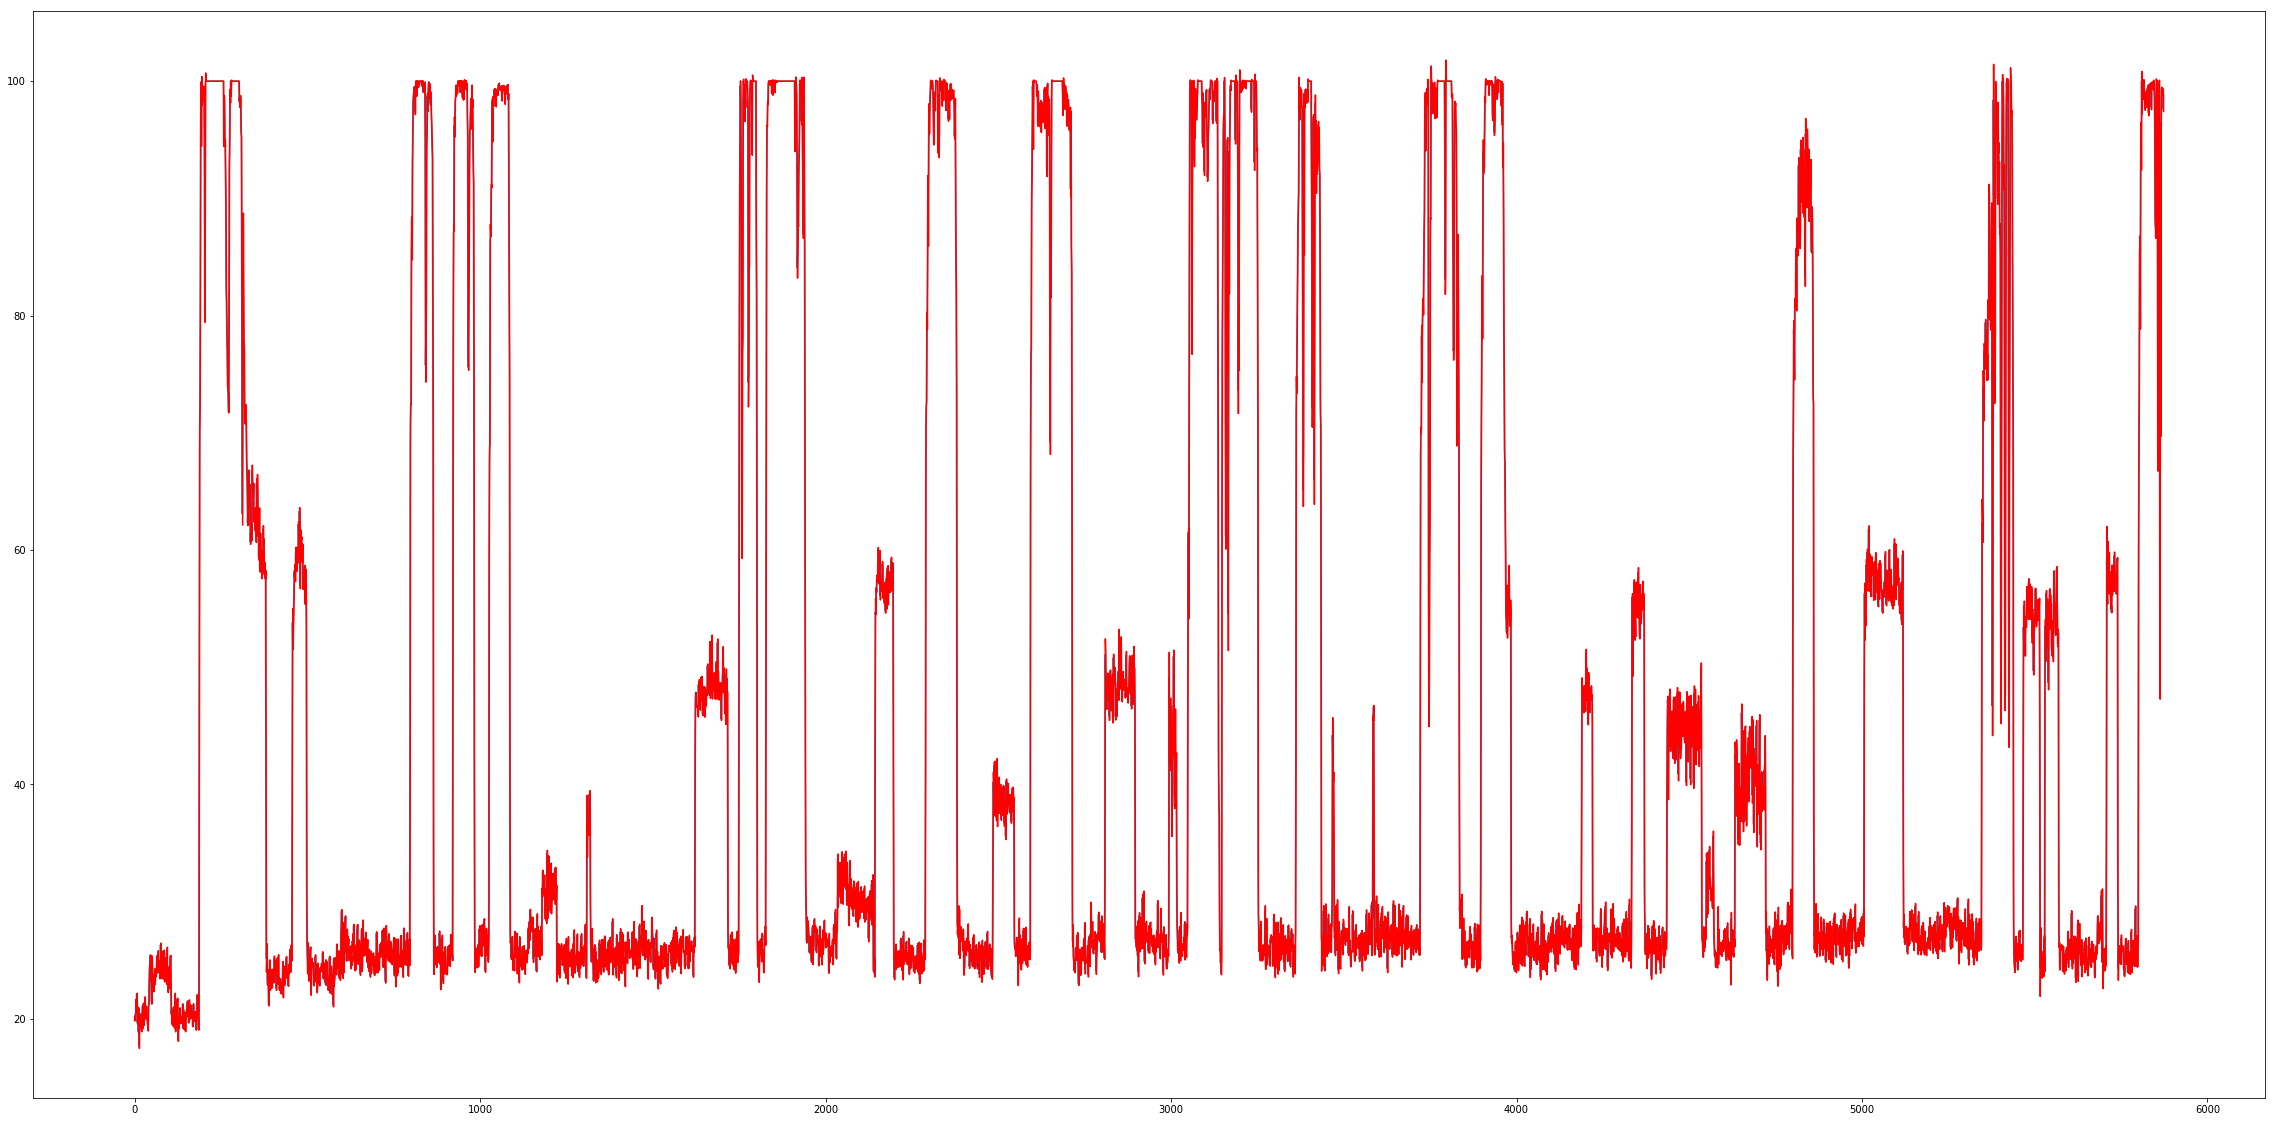

In [13]:
compute_ARIMA(series_final, 1, 1, 0, False, 40, 20)

Prédictions avec Modele ARIMA (1,0,0) lag order (p) = 1 et surtout (d)=0 (du coup sans tenir compte à une périodicité (comme si elle était stationnaire)
-------------------------------------------------------

+ tous les points

+ MSE = 16.798

5874


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 16.798


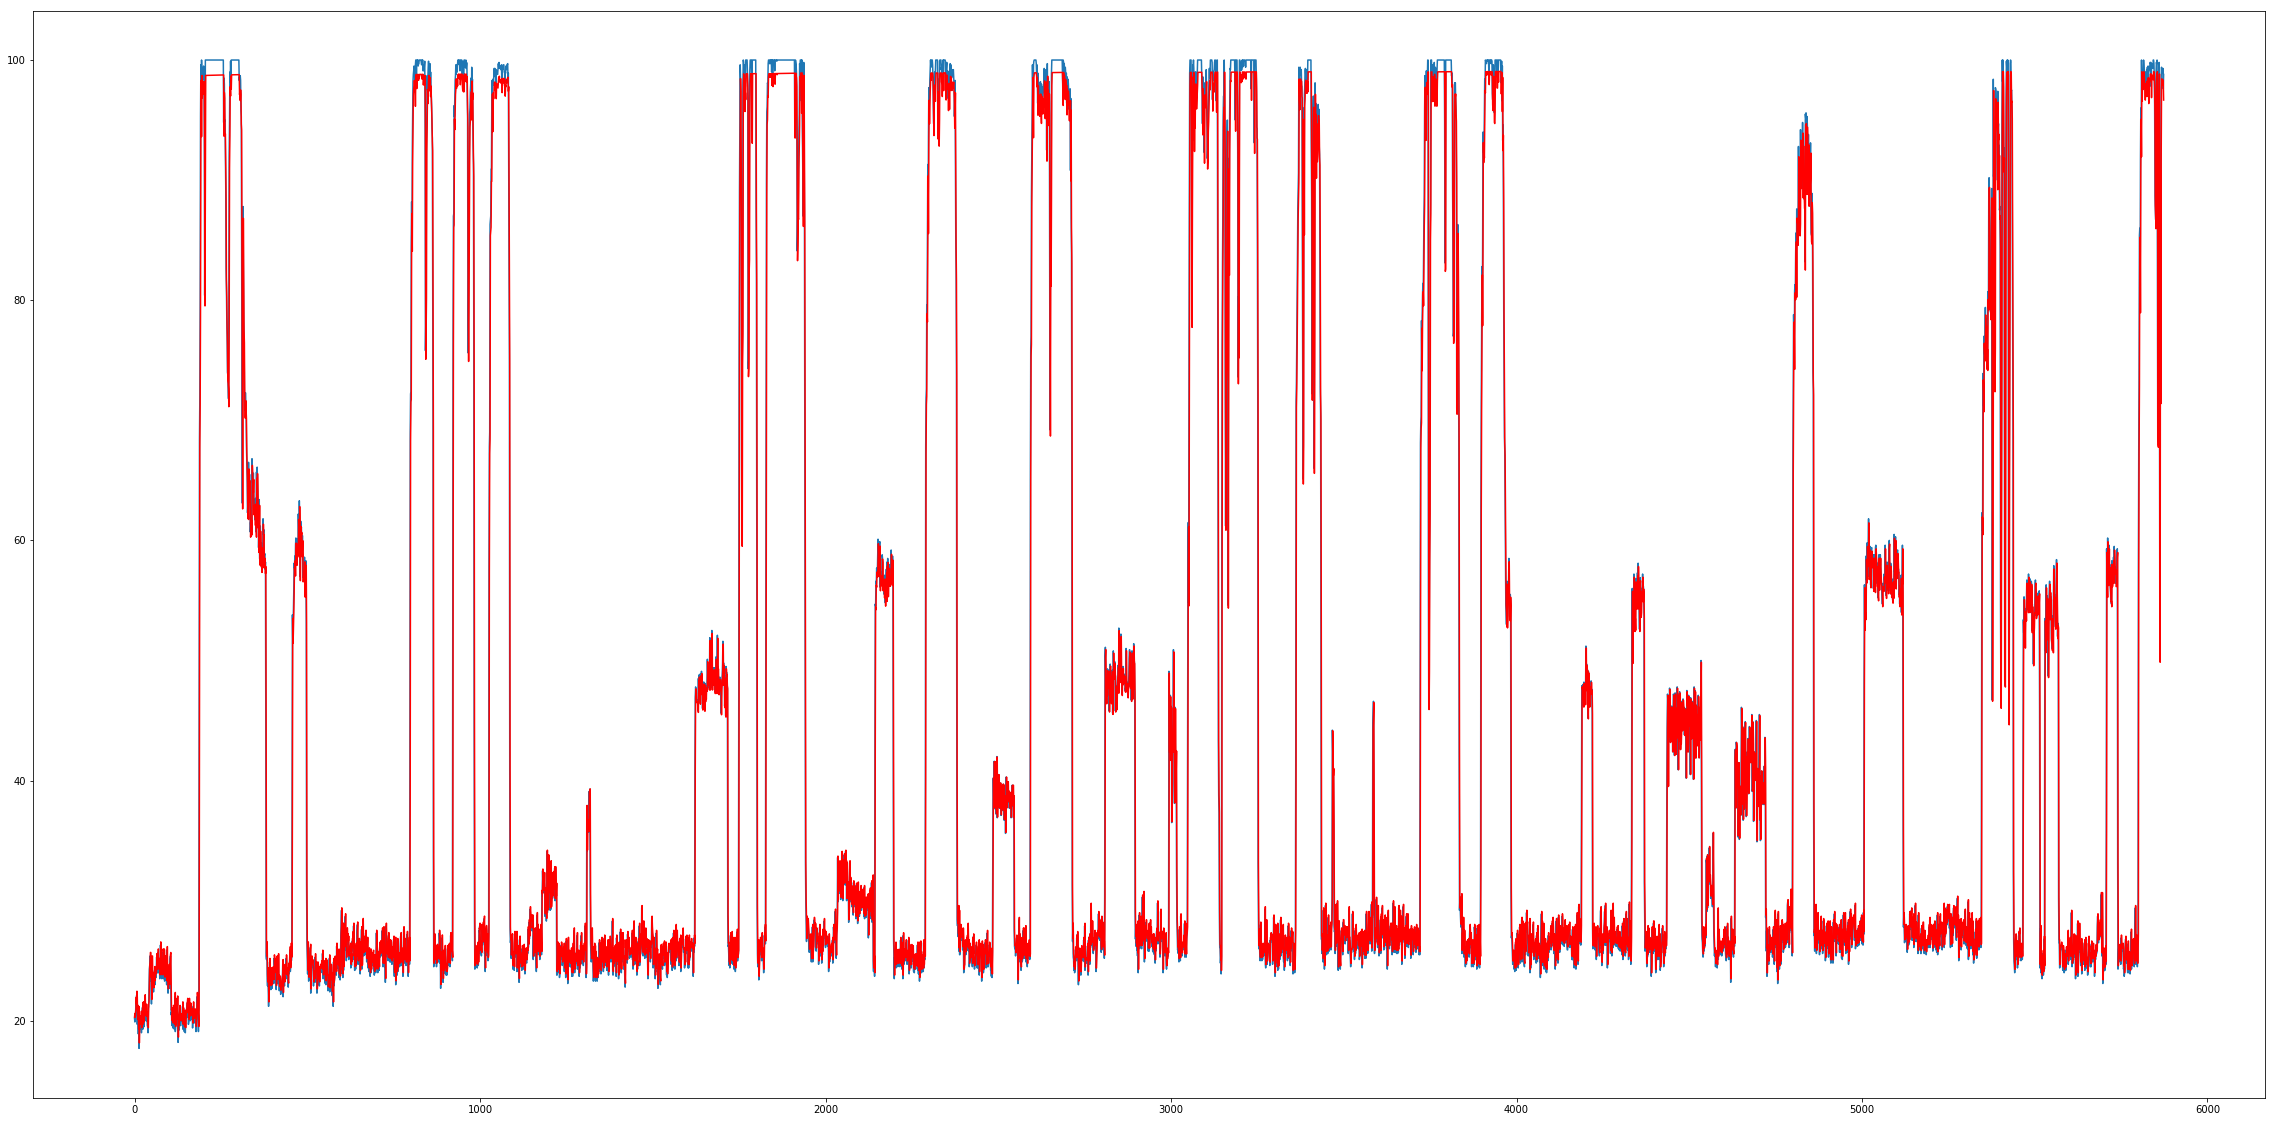

In [14]:
compute_ARIMA(series_final, 1, 0, 0, False, 40, 20)

Prédictions avec Modele ARIMA (10,1,0) lag order (p) = 10 et surtout (q)=1 (on suppose que chaque point est fonction des erreurs entachant les points précédent, plus sa propre erreur)
-------------------------------------------------------

+ 500 premier points

+ MSE = 3.223

170
Test MSE: 3.223


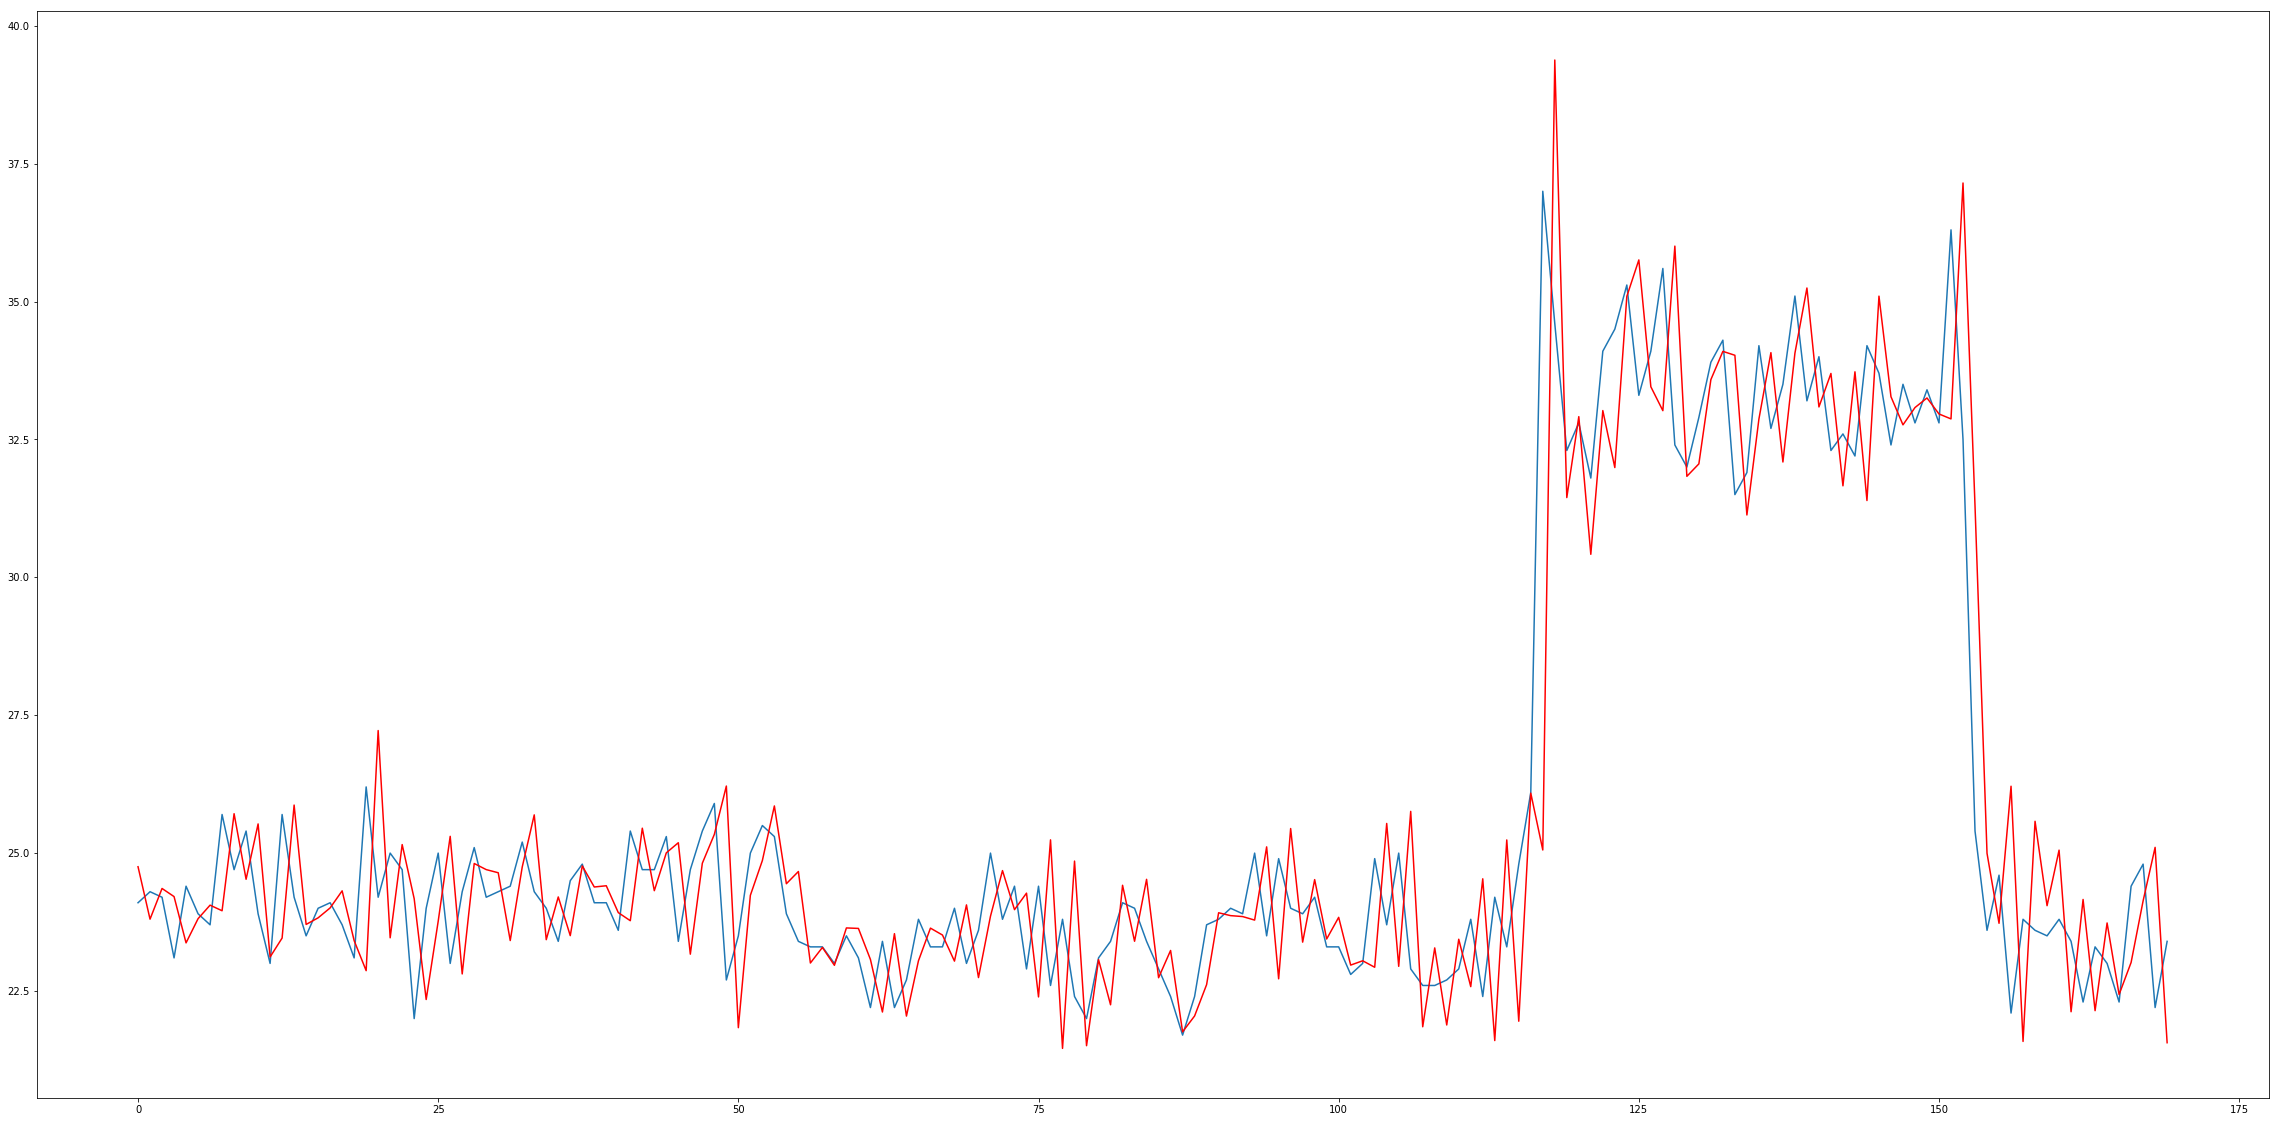

In [15]:
compute_ARIMA(series_final.head(500), 10, 1, 1, False, 40, 20)